1Q)Create a class called Current. The initialization method should give an initial velocity and direction which will default to 0 degrees (due north.) Add a method called get_vector() that returns the current velocity and direction. Each time get_vector() is called the velocity will randomly change in the range of 0.5 to 2.0 and the direction will change 
5 degrees. (The velocity will be feet per iteration.)

In [52]:
import random
import math

class Current:
    def __init__(self, initial_velocity=0, initial_direction=0):
        self.velocity = initial_velocity
        self.direction = initial_direction

    def get_vector(self):
        # Generate random changes in velocity and direction
        self.velocity += random.uniform(0.5, 2.0)  # Randomly update velocity within range
        self.direction = (self.direction + random.uniform(-5, 5)) % 360  # Randomly change direction within range

        return self.velocity, self.direction

# Example usage:
current = Current()  # Instantiate Current class
for _ in range(10):
    velocity, direction = current.get_vector()
    print(f"Velocity: {velocity:.2f} feet per iteration, Direction: {direction:.2f} degrees")


Velocity: 0.69 feet per iteration, Direction: 2.51 degrees
Velocity: 2.56 feet per iteration, Direction: 7.43 degrees
Velocity: 4.24 feet per iteration, Direction: 7.42 degrees
Velocity: 4.78 feet per iteration, Direction: 3.75 degrees
Velocity: 6.09 feet per iteration, Direction: 4.77 degrees
Velocity: 7.05 feet per iteration, Direction: 7.21 degrees
Velocity: 7.83 feet per iteration, Direction: 2.96 degrees
Velocity: 8.89 feet per iteration, Direction: 7.82 degrees
Velocity: 9.88 feet per iteration, Direction: 10.54 degrees
Velocity: 11.71 feet per iteration, Direction: 9.69 degrees


2Q) Create a class called Location to track the location an object, and a class called Canal to hold our rubber ducks, it also has a width  An attribute of the canal should be the current.  If an object hits the bank the vector will reflect off of the bank - that is if the direction is 45 degrees the reflection would be 135 degrees.

In [53]:
import math

class Location:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def update_position(self, velocity, direction):
        # Calculate new position based on velocity and direction
        radian_angle = math.radians(direction)
        self.x += velocity * math.cos(radian_angle)
        self.y += velocity * math.sin(radian_angle)

    def reflect_off_bank(self, direction):
        # Reflect the direction off the bank
        reflected_direction = (direction + 180) % 360
        return reflected_direction

class Canal:
    def __init__(self, width, current):
        self.width = width
        self.current = current

    def check_boundary(self, location):
        # Check if the location hits the bank
        if location.x < 0 or location.x > self.width or location.y < 0 or location.y > self.width:
            return True
        return False

    def move_object(self, location, obj):
        velocity, direction = self.current.get_vector()
        location.update_position(velocity, direction)

        if self.check_boundary(location):
            # Reflect object if it hits the bank
            direction = location.reflect_off_bank(direction)
            obj.on_bank_hit(direction)  # Call object's method to handle bank hit

        return location.x, location.y, direction  # Return updated location and direction

# Example usage:
current = Current()  # Assuming you have a Current class as previously defined
canal_width = 100  # Define canal width
duck_location = Location(10, 20)  # Initial duck location
canal = Canal(canal_width, current)

class RubberDuck:
    def on_bank_hit(self, direction):
        print(f"Duck hit the bank! Reflection direction: {direction:.2f} degrees")

rubber_duck = RubberDuck()

for _ in range(10):
    x, y, direction = canal.move_object(duck_location, rubber_duck)
    print(f"Duck's new location: ({x:.2f}, {y:.2f}), Direction: {direction:.2f} degrees")


Duck's new location: (11.77, 19.92), Direction: 357.31 degrees
Duck's new location: (15.02, 19.89), Direction: 359.58 degrees
Duck's new location: (19.19, 19.80), Direction: 358.75 degrees
Duck's new location: (25.26, 19.35), Direction: 355.76 degrees
Duck's new location: (32.20, 19.20), Direction: 358.73 degrees
Duck's new location: (40.14, 19.40), Direction: 1.47 degrees
Duck's new location: (49.61, 19.91), Direction: 3.05 degrees
Duck's new location: (60.91, 19.75), Direction: 359.19 degrees
Duck's new location: (72.97, 18.77), Direction: 355.37 degrees
Duck's new location: (85.93, 18.21), Direction: 357.52 degrees


3Q)Create a class called Duck (these are our racers) This will be similar to the Drunk class, except the take_step method should add two current vectors, one for the canal and the other for the wind, together to determine the impact of that step.

In [54]:
import random
import math

class Current:
    def __init__(self, initial_velocity=0, initial_direction=0):
        self.velocity = initial_velocity
        self.direction = initial_direction

    def get_vector(self):
        self.velocity += random.uniform(0.5, 2.0)
        self.direction = (self.direction + random.uniform(-5, 5)) % 360  # Modulo 360 to keep direction within 0-359 degrees
        return self.velocity, self.direction

class Duck:
    def __init__(self, x=0, y=0):
        self.location = Location(x, y)
        self.current = Current()
        self.wind = Current()

    def take_step(self):
        canal_velocity, canal_direction = self.current.get_vector()
        wind_velocity, wind_direction = self.wind.get_vector()

        # Add canal and wind vectors together
        total_velocity = canal_velocity + wind_velocity
        total_direction = (canal_direction + wind_direction) % 360

        self.location.update_position(total_velocity, total_direction)

        if canal.check_boundary(self.location):
            total_direction = self.location.reflect_off_bank(total_direction)
            self.on_bank_hit(total_direction)  # Call method to handle bank hit

        return self.location.x, self.location.y, total_direction

    def on_bank_hit(self, direction):
        print(f"Duck hit the bank! Reflection direction: {direction:.2f} degrees")

class Location:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def update_position(self, velocity, direction):
        # Calculate new position based on velocity and direction
        radian_angle = math.radians(direction)
        self.x += velocity * math.cos(radian_angle)
        self.y += velocity * math.sin(radian_angle)

    def reflect_off_bank(self, direction):
        # Reflect the direction off the bank
        reflected_direction = (direction + 180) % 360
        return reflected_direction

class Canal:
    def __init__(self, width, current):
        self.width = width
        self.current = current

    def check_boundary(self, location):
        # Check if the location hits the bank
        if location.x < 0 or location.x > self.width or location.y < 0 or location.y > self.width:
            return True
        return False

class RubberDuck:
    def on_bank_hit(self, direction):
        print(f"Duck hit the bank! Reflection direction: {direction:.2f} degrees")

# Example usage:
duck = Duck(10, 20)  # Create a duck object at position (10, 20)

for _ in range(10):
    x, y, direction = duck.take_step()
    print(f"Duck's new location: ({x:.2f}, {y:.2f}), Direction: {direction:.2f} degrees")


Duck's new location: (11.82, 19.78), Direction: 353.20 degrees
Duck's new location: (14.89, 19.69), Direction: 358.29 degrees
Duck's new location: (20.27, 20.07), Direction: 3.98 degrees
Duck's new location: (27.82, 20.93), Direction: 6.55 degrees
Duck's new location: (37.56, 21.91), Direction: 5.75 degrees
Duck's new location: (49.18, 24.36), Direction: 11.91 degrees
Duck's new location: (63.53, 28.70), Direction: 16.81 degrees
Duck's new location: (80.31, 33.36), Direction: 15.53 degrees
Duck hit the bank! Reflection direction: 192.67 degrees
Duck's new location: (100.67, 37.94), Direction: 192.67 degrees
Duck hit the bank! Reflection direction: 187.14 degrees
Duck's new location: (124.33, 40.90), Direction: 187.14 degrees


4a) Create a function called run_race that takes three parameter; the number of ducks, the width of the canal, and the length of the race. Start the race by placing the ducks next to one another in the middle of the canal. Then move the ducks until one crosses completes the length of the race. Each iteration should get the vector for the canal as well as a vector for the wind. Those two parameters will be provided to each duck as they move down the canal. 

In [55]:
def run_race(num_ducks, canal_width, race_length):
    ducks = [Duck(canal_width / 2, i * 2) for i in range(num_ducks)]  # Placing ducks next to each other in the middle of the canal

    while True:
        for duck in ducks:
            x, y, direction = duck.take_step()

            # Check if duck crosses the race length
            if x >= race_length:
                print(f"Duck at position ({x:.2f}, {y:.2f}) wins the race!")
                return

# Example usage:
num_ducks = 5
canal_width = 50
race_length = 200

run_race(num_ducks, canal_width, race_length)


Duck hit the bank! Reflection direction: 170.04 degrees
Duck hit the bank! Reflection direction: 163.50 degrees
Duck hit the bank! Reflection direction: 176.01 degrees
Duck hit the bank! Reflection direction: 185.70 degrees
Duck hit the bank! Reflection direction: 158.24 degrees
Duck hit the bank! Reflection direction: 176.75 degrees
Duck hit the bank! Reflection direction: 194.55 degrees
Duck hit the bank! Reflection direction: 180.70 degrees
Duck hit the bank! Reflection direction: 152.28 degrees
Duck hit the bank! Reflection direction: 187.64 degrees
Duck hit the bank! Reflection direction: 175.30 degrees
Duck hit the bank! Reflection direction: 189.58 degrees
Duck hit the bank! Reflection direction: 176.83 degrees
Duck hit the bank! Reflection direction: 155.59 degrees
Duck hit the bank! Reflection direction: 190.37 degrees
Duck hit the bank! Reflection direction: 174.38 degrees
Duck hit the bank! Reflection direction: 188.49 degrees
Duck hit the bank! Reflection direction: 170.68 

4b) When the first duck completes the race rank all the ducks based on how close they are to the finish (closest is second, and so on.) Plot o graph showing the progress of each duck.

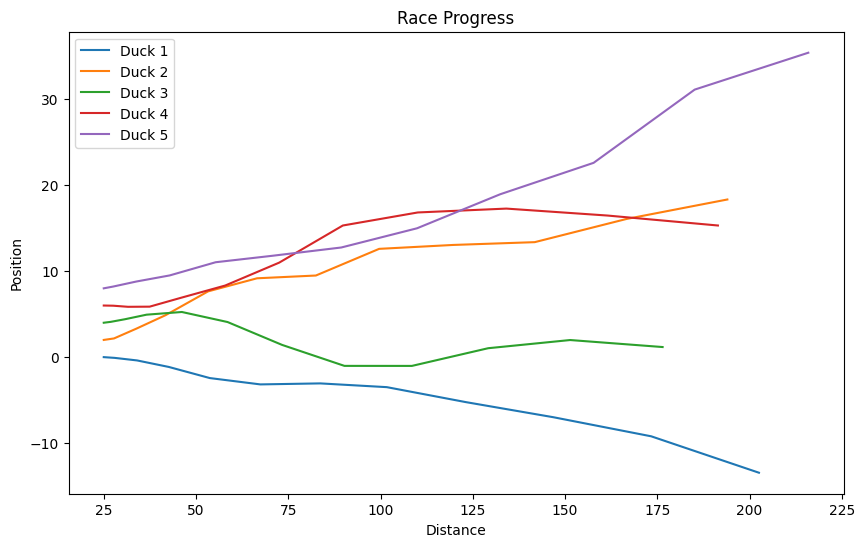

Ranking of Ducks based on race completion:
{1: 0, 2: 4}


In [62]:
import random
import math
import matplotlib.pyplot as plt

class Current:
    def __init__(self, initial_velocity=0, initial_direction=0):
        self.velocity = initial_velocity
        self.direction = initial_direction

    def get_vector(self):
        self.velocity += random.uniform(0.5, 2.0)
        self.direction = (self.direction + random.uniform(-5, 5)) % 360  # Modulo 360 to keep direction within 0-359 degrees
        return self.velocity, self.direction

class Location:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def update_position(self, velocity, direction):
        # Calculate new position based on velocity and direction
        radian_angle = math.radians(direction)
        self.x += velocity * math.cos(radian_angle)
        self.y += velocity * math.sin(radian_angle)

    def reflect_off_bank(self, direction):
        # Reflect the direction off the bank
        reflected_direction = (direction + 180) % 360
        return reflected_direction

class Duck:
    def __init__(self, x=0, y=0):
        self.location = Location(x, y)
        self.current = Current()
        self.wind = Current()
        self.location_history = [(x, y)]  # Initialize with starting position

    def take_step(self):
        canal_velocity, canal_direction = self.current.get_vector()
        wind_velocity, wind_direction = self.wind.get_vector()

        # Add canal and wind vectors together
        total_velocity = canal_velocity + wind_velocity
        total_direction = (canal_direction + wind_direction) % 360

        self.location.update_position(total_velocity, total_direction)
        self.location_history.append((self.location.x, self.location.y))  # Record new position

        # Assuming Canal and on_bank_hit methods remain the same

        return self.location.x, self.location.y, total_direction

def run_race(num_ducks, canal_width, race_length):
    ducks = [Duck(canal_width / 2, i * 2) for i in range(num_ducks)]  # Placing ducks next to each other in the middle of the canal
    winners = []  # List to hold the finishing order of ducks

    while True:
        for idx, duck in enumerate(ducks):
            x, _, _ = duck.take_step()

            # Check if duck crosses the race length
            if x >= race_length and idx not in winners:
                winners.append(idx)  # Record finishing order

        # Check if a duck has finished the race
        if len(winners) > 0:
            break

    # Rank ducks based on their finishing order
    ranked_ducks = {rank + 1: duck for rank, duck in enumerate(winners)}

    # Plotting the progress of each duck
    plt.figure(figsize=(10, 6))
    for idx, duck in enumerate(ducks):
        x_values = [location[0] for location in duck.location_history]
        y_values = [location[1] for location in duck.location_history]
        plt.plot(x_values, y_values, label=f'Duck {idx + 1}')

    plt.xlabel('Distance')
    plt.ylabel('Position')
    plt.title('Race Progress')
    plt.legend()
    plt.show()

    return ranked_ducks

# Example usage:
num_ducks = 5
canal_width = 50
race_length = 200

ranked_ducks = run_race(num_ducks, canal_width, race_length)
print("Ranking of Ducks based on race completion:")
print(ranked_ducks)


5) Run a race of 5 ducks in a 20 foot canal for a length of 50 feet.

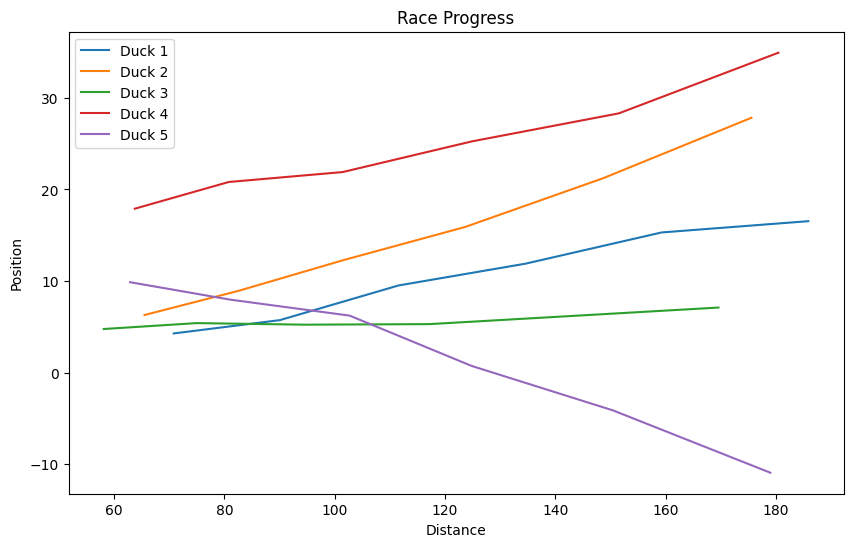

Ranking of Ducks based on race completion:
{1: 0}


In [60]:
num_ducks = 5
canal_width = 20
race_length = 50

ranked_ducks = run_race(num_ducks, canal_width, race_length)
print("Ranking of Ducks based on race completion:")
print(ranked_ducks)


6Q) Create a subclass of Current called Wind that will model some additional random behavior. 5% of the time the wind can change direction in the range of 
15 to 20 degrees and 1% of the time will gust an addition 20 feet per iteration and will last 3 iterations. Make appropriate changes to the run_race function and rerun the race as described in step 5.

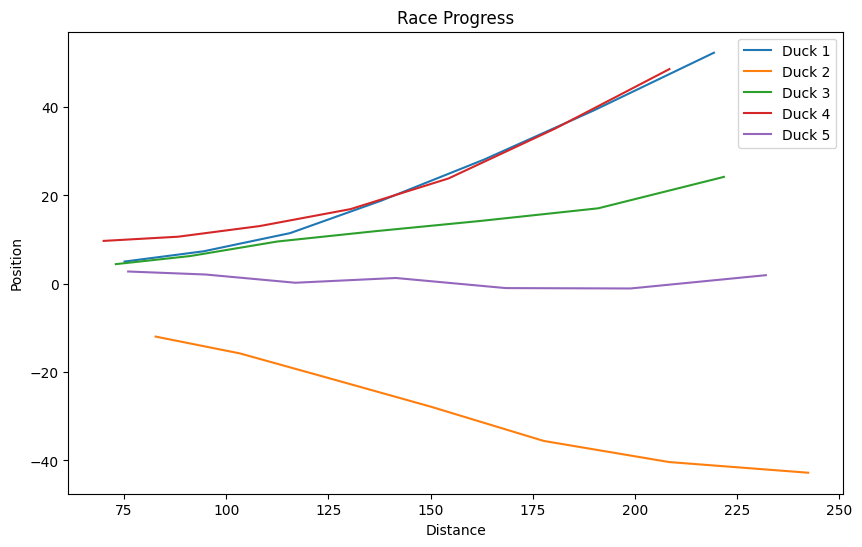

Ranking of Ducks based on race completion:
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}


In [59]:
class Wind(Current):
    def __init__(self, initial_velocity=0, initial_direction=0):
        super().__init__(initial_velocity, initial_direction)
        self.gust_counter = 0

    def get_vector(self):
        # 5% chance to change direction in the range of 15 to 20 degrees
        if random.random() <= 0.05:
            self.direction += random.uniform(15, 20)  # Change direction

        # 1% chance to gust additional 20 feet per iteration for 3 iterations
        if random.random() <= 0.01 and self.gust_counter == 0:
            self.velocity += 20
            self.gust_counter = 3  # Gust lasts for 3 iterations

        if self.gust_counter > 0:
            self.gust_counter -= 1
        else:
            self.velocity = max(0, self.velocity - 1)  # Decrease gust velocity after gust period

        return self.velocity, self.direction

# Modify the run_race function to use the Wind class for the wind effect
def run_race(num_ducks, canal_width, race_length):
    ducks = [Duck(canal_width / 2, i * 2) for i in range(num_ducks)]  # Placing ducks next to each other in the middle of the canal
    winners = []  # List to hold the finishing order of ducks

    while True:
        for idx, duck in enumerate(ducks):
            x, _, _ = duck.take_step()

            # Check if duck crosses the race length
            if x >= race_length and idx not in winners:
                winners.append(idx)  # Record finishing order

        # Check if a duck has finished the race
        if len(winners) > 0:
            break

    # Rank ducks based on their finishing order
    ranked_ducks = {rank + 1: duck for rank, duck in enumerate(winners)}

    # Plotting the progress of each duck
    plt.figure(figsize=(10, 6))
    for idx, duck in enumerate(ducks):
        x_values = []
        y_values = []
        for _ in range(len(duck.location_history)):
            x, y, _ = duck.take_step()
            x_values.append(x)
            y_values.append(y)
        plt.plot(x_values, y_values, label=f'Duck {idx + 1}')

    plt.xlabel('Distance')
    plt.ylabel('Position')
    plt.title('Race Progress')
    plt.legend()
    plt.show()

    return ranked_ducks

# Run the race with Wind effect
num_ducks = 5
canal_width = 20
race_length = 50

ranked_ducks = run_race(num_ducks, canal_width, race_length)
print("Ranking of Ducks based on race completion:")
print(ranked_ducks)
